### 2. Train FCNN and CNN on fashion dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, InputLayer, Input
from keras import Sequential
from keras.datasets.mnist import load_data
from keras.utils import to_categorical
from keras.losses import SparseCategoricalCrossentropy

In [2]:
(X_train, y_train),(X_test, y_test) = load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [13]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

imageData = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=.2,
    height_shift_range=.2,
    zoom_range=.2
)

In [ ]:
X_train_aug = imageData.flow(X_train, batch_size=32)

In [4]:
# Reshape the data to add a channel dimension (for CNN)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

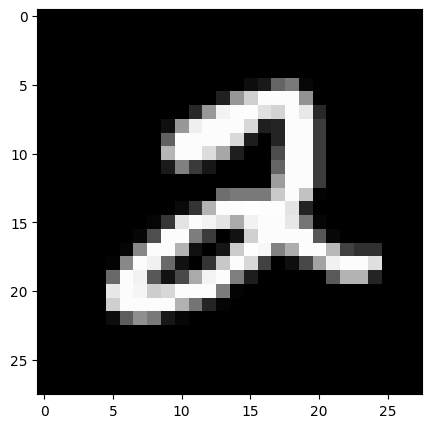

In [5]:
plt.figure(figsize = (10,5))
plt.imshow(X_train[5], cmap='gray')
plt.show()

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0


In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [9]:
FCNN_model = Sequential()
FCNN_model.add(InputLayer((28,28)))
FCNN_model.add(Flatten())
FCNN_model.add(Dense(512, activation='relu'))
FCNN_model.add(Dense(32, activation='relu'))
FCNN_model.add(Dense(10, activation='softmax'))

In [17]:
FCNN_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 418,666 (1.60 MB)

 Trainable params: 418,666 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
FCNN_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
FCNN_history = FCNN_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7826 - loss: 0.6233 - val_accuracy: 0.8617 - val_loss: 0.3823
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8667 - loss: 0.3669 - val_accuracy: 0.8727 - val_loss: 0.3554
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8793 - loss: 0.3322 - val_accuracy: 0.8782 - val_loss: 0.3352
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8873 - loss: 0.3039 - val_accuracy: 0.8798 - val_loss: 0.3284
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8919 - loss: 0.2891 - val_accuracy: 0.8840 - val_loss: 0.3193


In [20]:
FCNN_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8773 - loss: 0.3360


[0.34017884731292725, 0.8765000104904175]

In [11]:
CNN_model = Sequential()
CNN_model.add(InputLayer((28,28,1)))
CNN_model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
CNN_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
CNN_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
CNN_model.add(Flatten())
CNN_model.add(Dense(512, activation='relu'))
CNN_model.add(Dense(10,  activation='softmax'))


In [12]:
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
CNN_model.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [14]:
CNN_history = CNN_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.6961 - loss: 0.8113 - val_accuracy: 0.8238 - val_loss: 0.4660
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8433 - loss: 0.4293 - val_accuracy: 0.8613 - val_loss: 0.3765
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8622 - loss: 0.3686 - val_accuracy: 0.8675 - val_loss: 0.3491
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8794 - loss: 0.3264 - val_accuracy: 0.8788 - val_loss: 0.3283
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8900 - loss: 0.2969 - val_accuracy: 0.8805 - val_loss: 0.3231


In [15]:
CNN_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8817 - loss: 0.3416


[0.33968019485473633, 0.8781999945640564]

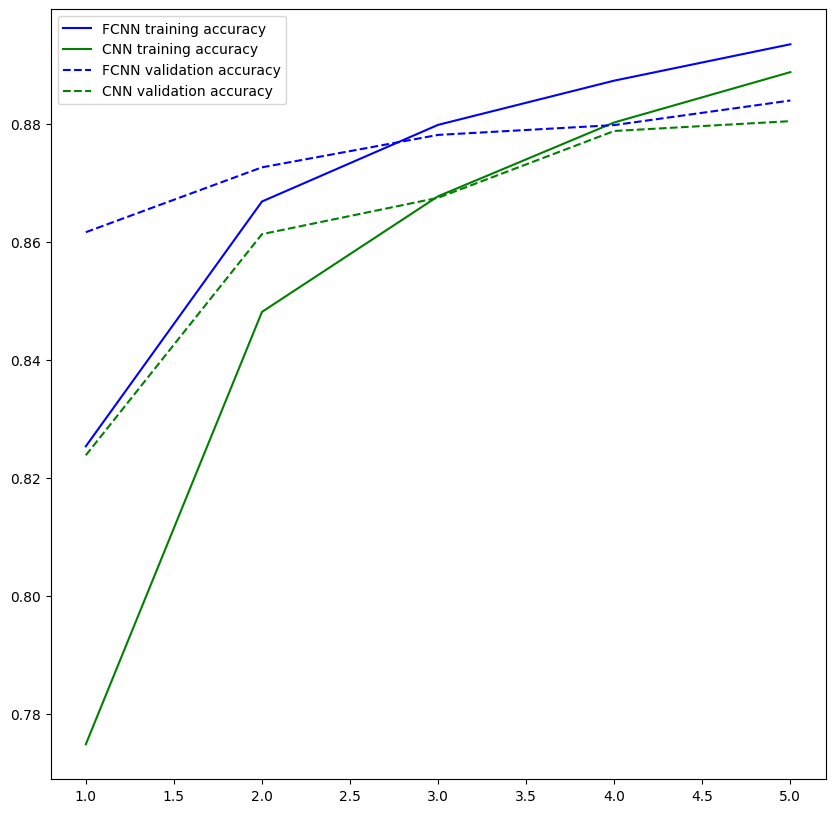

In [24]:
epochs = range(1, len(CNN_history.history['accuracy'])+1)

plt.figure(figsize=(10,10))
plt.plot(epochs, FCNN_history.history['accuracy'], 'b-', label = 'FCNN training accuracy')
plt.plot(epochs, CNN_history.history['accuracy'], 'g-', label = 'CNN training accuracy')

plt.plot(epochs, FCNN_history.history['val_accuracy'], 'b--', label = 'FCNN validation accuracy')
plt.plot(epochs, CNN_history.history['val_accuracy'], 'g--', label = 'CNN validation accuracy')
plt.legend()
plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape: (28, 28) -> (28, 28, 1) for CNN
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the generator to training data
datagen.fit(x_train)

# Define a small CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train using augmented data
model.fit(datagen.flow(x_train, y_train, batch_size=64),
          epochs=5,
          validation_data=(x_test, y_test))


C:\Users\mdsho\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mdsho\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 67ms/step - accuracy: 0.7286 - loss: 0.8228 - val_accuracy: 0.9827 - val_loss: 0.0522
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.9406 - loss: 0.1953 - val_accuracy: 0.9889 - val_loss: 0.0312
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.9599 - loss: 0.1351 - val_accuracy: 0.9901 - val_loss: 0.0285
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 60ms/step - accuracy: 0.9652 - loss: 0.1178 - val_accuracy: 0.9911 - val_loss: 0.0235
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9712 - loss: 0.1007 - val_accuracy: 0.9913 - val_loss: 0.0264


In [ ]:
from sklearn.preprocessing import minmax_scale